# Import required libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score


# Read the Dataset

In [2]:
#import dataset
data = pd.read_csv("D:\dataset.csv")
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


# Handling Null Values


In [3]:
data.info()
data.isnull().any()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

# Splitting The Data

In [4]:
x=data.iloc[:,1:31].values
y=data.iloc[:,-1].values
print(x,y)

[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]] [-1 -1 -1 ... -1 -1 -1]


In [5]:
#Splitting data into train  and test
from scipy.sparse.construct import random
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

C:\Users\MOHAN S\AppData\Local\Temp\ipykernel_4212\472530335.py:2: DeprecationWarning: Please use `random` from the `scipy.sparse` namespace, the `scipy.sparse.construct` namespace is deprecated.
  from scipy.sparse.construct import random


In [6]:
x_train.shape

(8844, 30)

In [7]:
y_train.shape

(8844,)

In [8]:
x_test.shape

(2211, 30)

In [9]:
y_test.shape

(2211,)

# Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


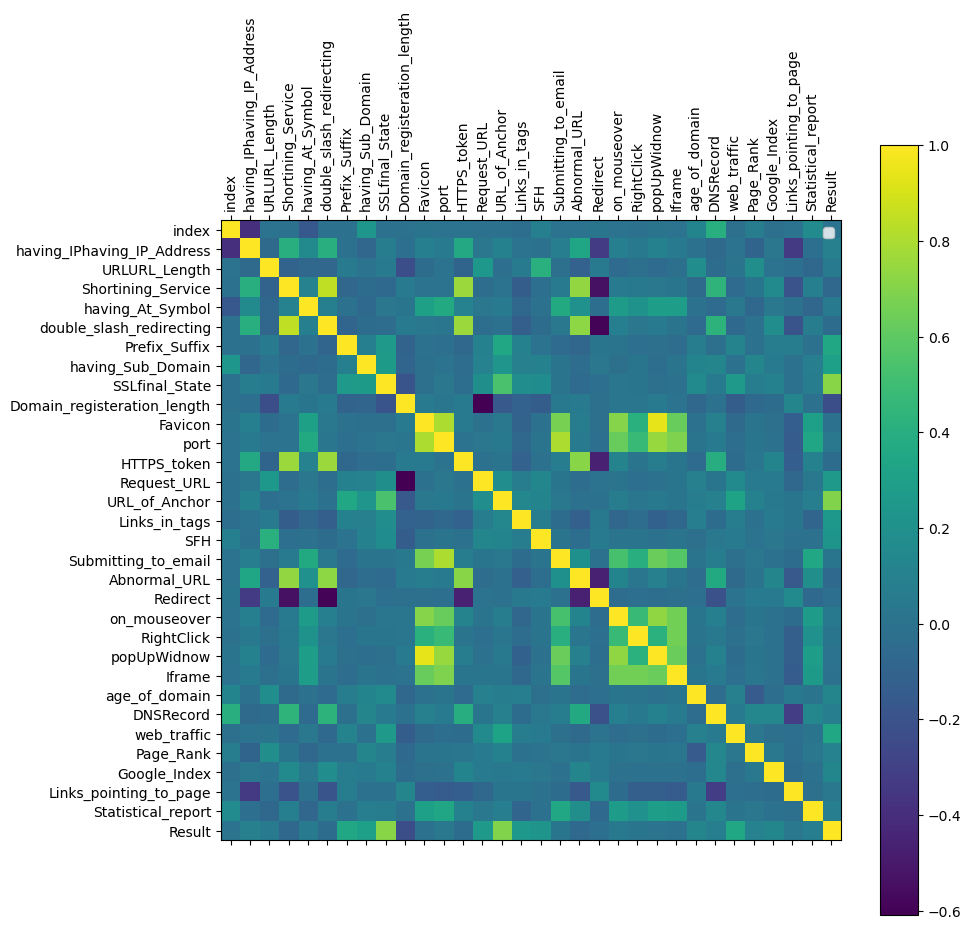

In [11]:
def plot_corr(df,size=10):
    
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    

plot_corr(data)

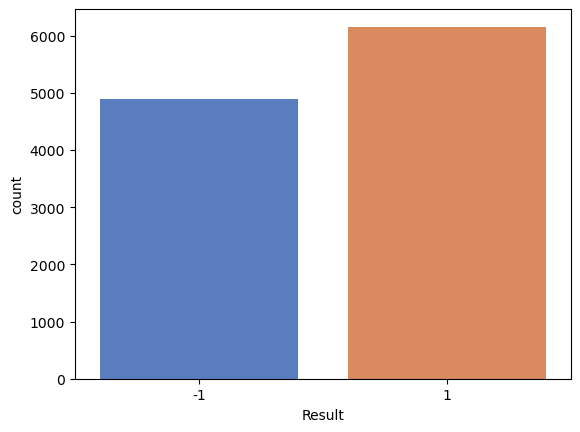

In [12]:
with sns.color_palette('muted'):
    sns.countplot(x=data['Result'])

In [13]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_pred1=lr.predict(x_test)
from sklearn.metrics import accuracy_score
log_reg=accuracy_score(y_test,y_pred1)
log_reg

0.9167797376752601

In [17]:
import pickle
pickle.dump(lr,open('phishing_website.pkl','wb'))